In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Batsman_Data = pd.read_csv('Batsman_Data.csv')
Ground_Data = pd.read_csv('Ground_Averages.csv')
ODI_Scores_Data = pd.read_csv('ODI_Match_Totals.csv')
ODI_Results_Data = pd.read_csv('ODI_Match_Results.csv')
WC_Players_Data = pd.read_csv('WC_players.csv')
Bowler_Data = pd.read_csv('Bowler_data.csv')

In [ ]:
Ground_Data.sample(6)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
33,"VRA Ground, Amstelveen - Netherlands",2013-2018,5,4,1,0,2273,86,2845,26.43,4.79
80,"Zahur Ahmed Chowdhury Stadium, Chattogram - Ba...",2014-2018,6,6,0,0,2872,74,3224,38.81,5.34
68,"Bay Oval, Mount Maunganui - New Zealand",2014-2019,9,9,0,0,4740,135,5033,35.11,5.65
100,"Brabourne Stadium, Mumbai - India",2018-2018,1,1,0,0,530,15,518,35.33,6.13
16,"Manuka Oval, Canberra - Australia",2013-2016,7,7,0,0,4226,110,4026,38.41,6.29
67,"Bert Sutcliffe Oval, Lincoln - New Zealand",2014-2014,2,2,0,0,1060,26,1114,40.76,5.70


In [ ]:
ODI_Results_Data.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [ ]:
ODI_Scores_Data.head(100)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,848,293/7,50.0,5.86,NaN,1,lost,v Sri Lanka,The Oval,13 Jun 2013,ODI # 3370,England,1
96,11,190/6,26.1,7.26,191.0,2,tied,v South Africa,Cardiff,14 Jun 2013,ODI # 3371,WestIndies,4
97,288,230/6,31.0,7.41,NaN,1,tied,v West Indies,Cardiff,14 Jun 2013,ODI # 3371,SouthAfrica,3
98,424,165,39.4,4.15,NaN,1,lost,v India,Birmingham,15 Jun 2013,ODI # 3372,Pakistan,7


In [ ]:
#ODI scores data provide much more data than ODI results so we copy columm name and then delete
ODI_Scores_Data["Scores_ID"] = ODI_Scores_Data["Unnamed: 0"]
ODI_Scores_Data.drop(columns="Unnamed: 0",inplace=True)


In [ ]:
ODI_Scores_Data[(ODI_Scores_Data.Country == 'India')]

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
1,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6,680
3,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6,681
6,316/9,50.0,6.32,326.0,2,lost,v England,Rajkot,11 Jan 2013,ODI # 3318,India,6,682
10,285/6,50.0,5.70,NaN,1,won,v England,Kochi,15 Jan 2013,ODI # 3320,India,6,683
14,157/3,28.1,5.57,156.0,2,won,v England,Ranchi,19 Jan 2013,ODI # 3322,India,6,684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,240/4,48.2,4.96,237.0,2,won,v Australia,Hyderabad (Deccan),2 Mar 2019,ODI # 4102,India,6,831
1246,250,48.2,5.17,NaN,1,won,v Australia,Nagpur,5 Mar 2019,ODI # 4106,India,6,832
1251,281,48.2,5.81,314.0,2,lost,v Australia,Ranchi,8 Mar 2019,ODI # 4109,India,6,833
1254,358/9,50.0,7.16,NaN,1,lost,v Australia,Mohali,10 Mar 2019,ODI # 4111,India,6,834


In [ ]:
#England grounds
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]
WC_venue_pitches

['The Oval, London',
 'Trent Bridge, Nottingham',
 'Sophia Gardens, Cardiff',
 'County Ground, Bristol',
 'Rose Bowl, Southampton',
 'County Ground, Taunton',
 'Old Trafford, Manchester',
 'Edgbaston, Birmingham',
 'Headingley, Leeds',
 "Lord's, London",
 'Riverside Ground, Chester-le-Street']

In [ ]:
#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = ODI_Scores_Data.Ground #all grounds list
for i in ODI_Grounds:
   for j in WC_venue_pitches:
      if i in j:       #if some part matches like both lord or london then it will add
          #print("i ; ",i,"--j : ",j)
         WC_Ground_Stats.append((i,j))
WC_Ground_Stats

[("Lord's", "Lord's, London"),
 ("Lord's", "Lord's, London"),
 ('Southampton', 'Rose Bowl, Southampton'),
 ('Southampton', 'Rose Bowl, Southampton'),
 ('Nottingham', 'Trent Bridge, Nottingham'),
 ('Nottingham', 'Trent Bridge, Nottingham'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Birmingham', 'Edgbaston, Birmingham'),
 ('Birming

In [ ]:
Ground_names = dict(set(WC_Ground_Stats))  #converting into dict and creating function
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Southampton': 'Rose Bowl, Southampton',
 'The Oval': 'The Oval, London',
 'Bristol': 'County Ground, Bristol',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Nottingham': 'Trent Bridge, Nottingham',
 "Lord's": "Lord's, London",
 'Manchester': 'Old Trafford, Manchester',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Birmingham': 'Edgbaston, Birmingham',
 'Leeds': 'Headingley, Leeds'}

In [ ]:
WC_Grounds_History = ODI_Scores_Data[ODI_Scores_Data.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()


,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
74,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5,557
75,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1,844
76,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5,558
77,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1,845
78,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5,559


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'SriLanka'),
  Text(5, 0, 'Newzealad'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'WestIndies'),
  Text(8, 0, 'Bangladesh')])

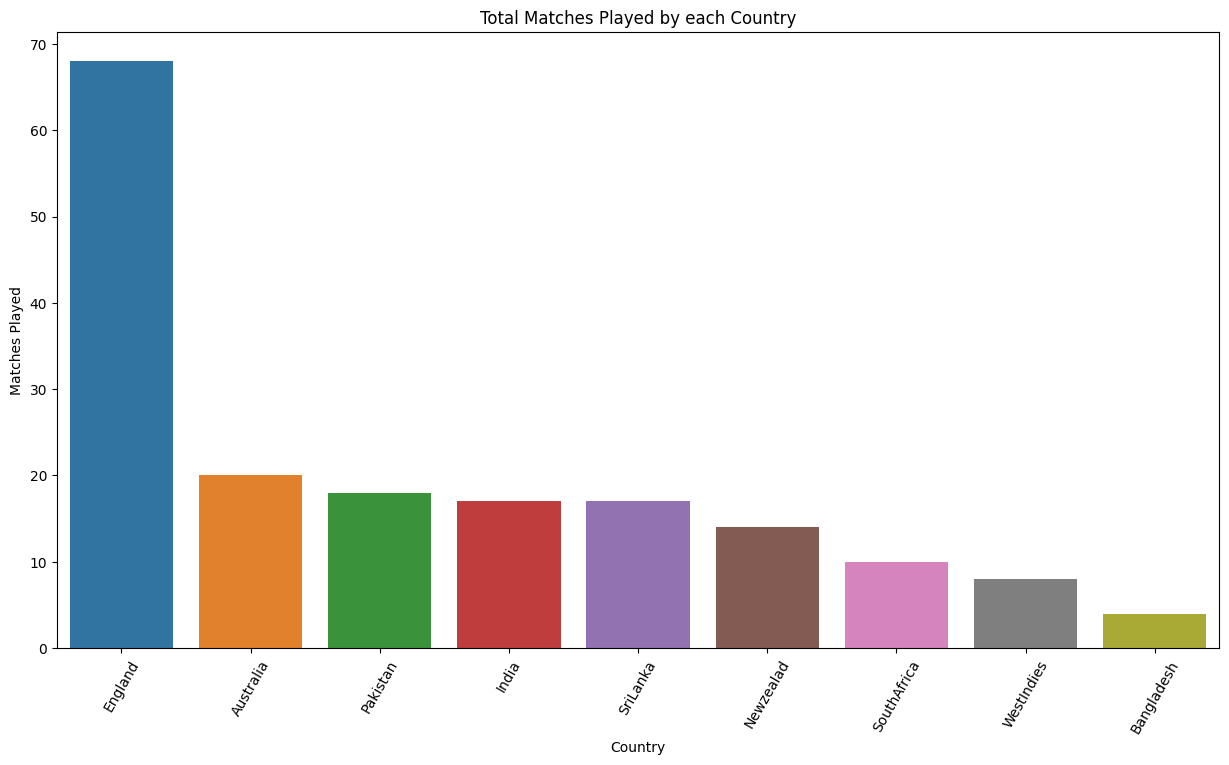

In [ ]:
# How many WC teams have played in these venues before and what are they?*
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)


In [ ]:
#Team wise Winning Percentage in England Pitches
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

In [ ]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])] #we will remove these 2 '-'
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [ ]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1 #created new column and put 1 value

Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head(13)

,Country,Result,Count
0,Australia,lost,55.000000
1,Australia,n/r,20.000000
2,Australia,won,25.000000
3,Bangladesh,lost,50.000000
4,Bangladesh,n/r,25.000000
5,Bangladesh,won,25.000000
6,England,lost,31.343284
7,England,n/r,5.970149
8,England,tied,1.492537
9,England,won,61.194030


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Bangladesh'),
  Text(2, 0, 'England'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Newzealad'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'SriLanka'),
  Text(8, 0, 'WestIndies')])

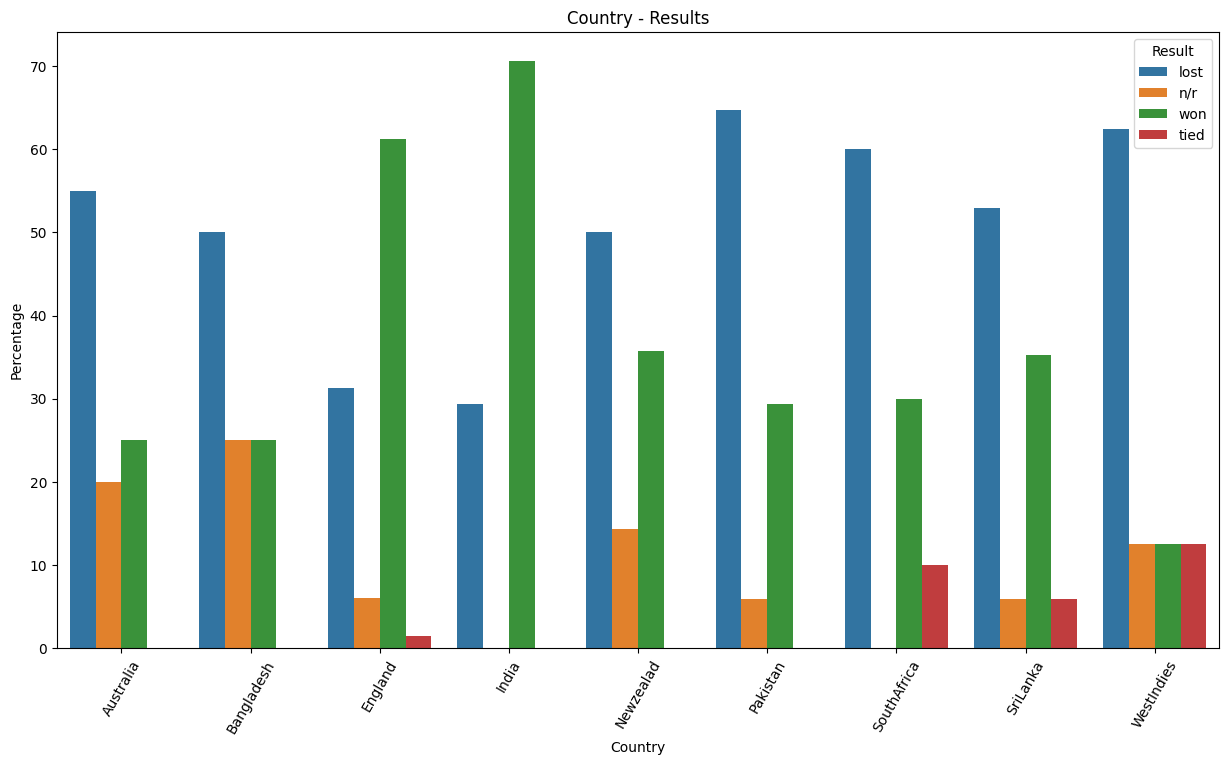

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)
#we see england and india are top performers

Text(0.5, 0, 'England')

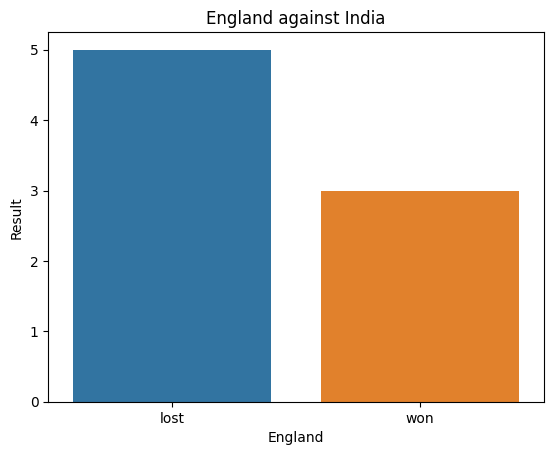

In [ ]:
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("England against India")
plt.xlabel("England")

Text(0, 0.5, 'Winning Percentage')

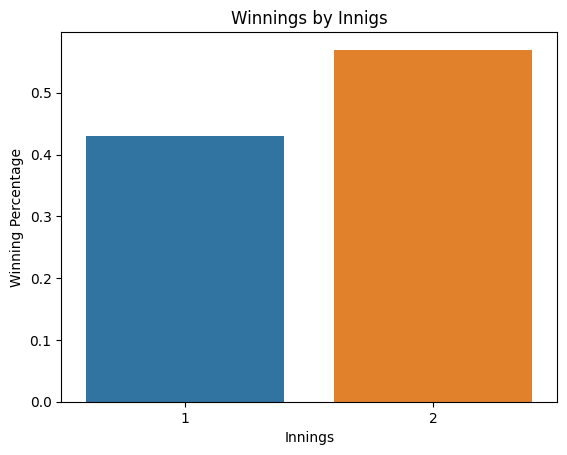

In [ ]:
# Let's analyze the Win and Lose Percentage based on Innings wrt Stadium
Inning_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
sns.barplot(x = "index", y = "Inns", data = Inning_Wins).set_title("Winnings by Innigs")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

In [ ]:
# Batting second wins more now we will divide acc to pitches
Pitch_Innings = WC_Grounds_History[WC_Grounds_History.Result == "won"][["Inns","Ground"]]
Pitch_Innings["Count"] = 1
Pitch_Innings = Pitch_Innings.groupby(["Ground","Inns"]).sum()
Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Pitch_Innings.columns = ["Ground", "Inns","Wins"]
Pitch_Innings.head( 5 )

,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000


In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)